# Abstract

This dataset contains a total of 8 attributes and concerns over predicting the fuel consumption of various vehicles rode in cities. Therefore, this is a job of regression with multiple variables. The following is the architecture of how data is laid out in the dataset.
1. MPG (Miles per Gallon)
2. Cylinders
3. Displacement
4. Horsepower
5. Weight
6. Acceleration
7. Model year
8. Origin
9. Car Name

Pre-requisites : 
1. ipywidget : 
    If not installed, run :
            pip install ipywidgets
    to install ipywidget

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import profile_report
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

# Data Exploration

In [2]:
# Reading Dataset
dataframe = pd.read_csv("competition_edu_dataset.csv")

In [3]:
dataframe.shape

(300, 9)

In [4]:
dataframe.head()

MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model Year  \
0  13.0          8         400.0        190    4422          12.5          72   
1  13.0          8         350.0        145    3988          13.0          73   
2  15.5          8         350.0        170    4165          11.4          77   
3  17.0          6         231.0        110    3907          21.0          75   
4  13.0          8         318.0        150    3755          14.0          76   

   Origin                      Car Name  
0       1        chrysler newport royal  
1       1              chevrolet malibu  
2       1  chevrolet monte carlo landau  
3       1                 buick century  
4       1                    dodge d100

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    300 non-null    object 
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 21.2+ KB


There is some issue with the 'Horsepower' variable. The horsepower feature is clearly numeric, but is reported as an object.

In [6]:
dataframe.loc[~dataframe['Horsepower'].astype(str).str.isdigit()]

MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  \
47   34.5          4         100.0          ?    2320          15.8   
141  23.6          4         140.0          ?    2905          14.3   
231  25.0          4          98.0          ?    2046          19.0   
261  21.0          6         200.0          ?    2875          17.0   
284  23.0          4         151.0          ?    3035          20.5   
299  40.9          4          85.0          ?    1835          17.3   

     Model Year  Origin              Car Name  
47           81       2           renault 18i  
141          80       1    ford mustang cobra  
231          71       1            ford pinto  
261          74       1         ford maverick  
284          82       1        amc concord dl  
299          80       2  renault lecar deluxe

Here we can see that 6 entries of HorsePower are set to '?'

In [7]:
# Replacing the missing values in HorsePower with NaN
dataframe = dataframe.replace('?',np.NaN)
dataframe['Horsepower'] = dataframe['Horsepower'].astype('float64')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    294 non-null    float64
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 21.2+ KB


In [8]:
# Splitting Car Name into Brand and Model

dataframe['Brand'] = dataframe['Car Name'].str.split(' ',1).str.get(0)
dataframe['Model'] = dataframe['Car Name'].str.split(' ',1).str.get(1)
dataframe.drop('Car Name' , axis = 1 , inplace=True)
dataframe.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  13.0          8         400.0       190.0    4422          12.5   
1  13.0          8         350.0       145.0    3988          13.0   
2  15.5          8         350.0       170.0    4165          11.4   
3  17.0          6         231.0       110.0    3907          21.0   
4  13.0          8         318.0       150.0    3755          14.0   

   Model Year  Origin      Brand               Model  
0          72       1   chrysler       newport royal  
1          73       1  chevrolet              malibu  
2          77       1  chevrolet  monte carlo landau  
3          75       1      buick             century  
4          76       1      dodge                d100

In [9]:
dataframe.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Insights

1. There are missing cells
2. There are no duplicate rows
3. MPG is highly correlated with :
    i) Cylinder
   ii) Weight
  iii) Displacement
   iv) Model Year
    v) Origin
4. Horsepower and Car Name as high cardinality
5. Cylinders , Origin, Brand, Model has categorical values

We will further investigate these observations in our manual analysis.

# Data Analysis

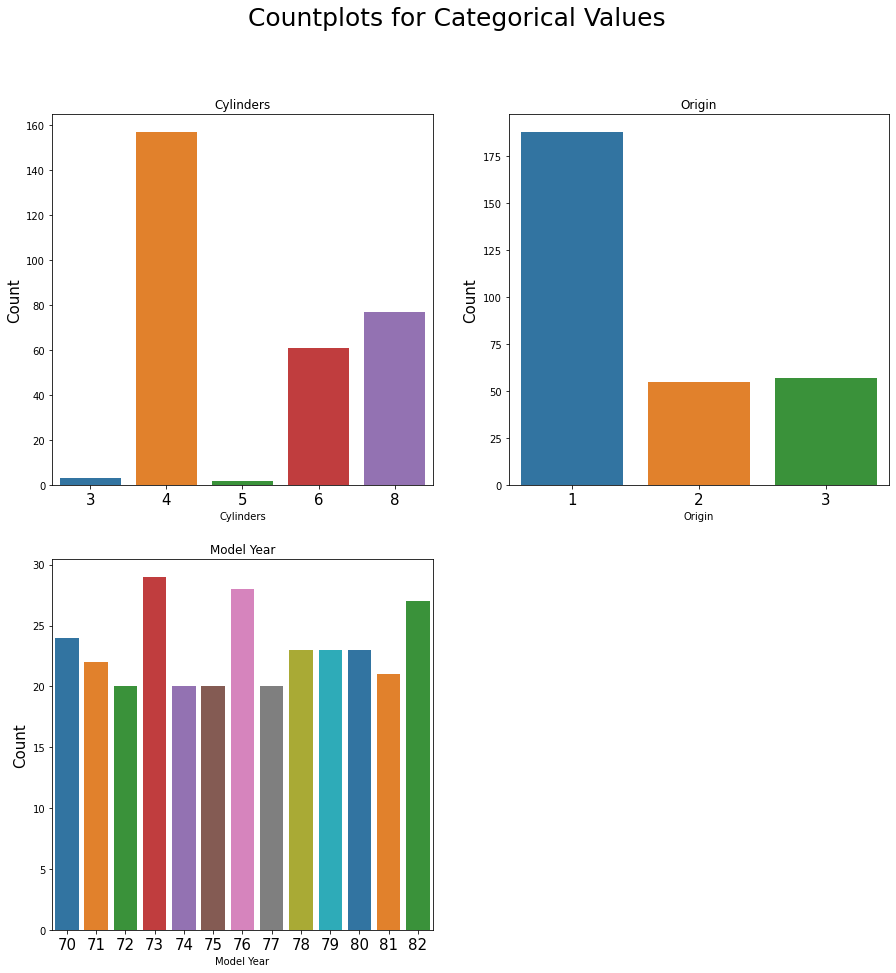

In [10]:
n_rows , n_cols = (2,2)

figure , axes = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (15,15))
figure.suptitle('Countplots for Categorical Values' , fontsize = 25)

categorical_cols = {'Cylinders','Origin','Model Year'}

for index,col in enumerate(categorical_cols):
    i,j = index // n_cols, index % n_cols
    fig = sns.countplot(x=col , data=dataframe , palette='tab10' , ax=axes[i,j])
    axes[i,j].set_title(col)
    axes[i,j].set_ylabel("Count",fontsize=15)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize=15)
    
figure.delaxes(axes[1,1])   

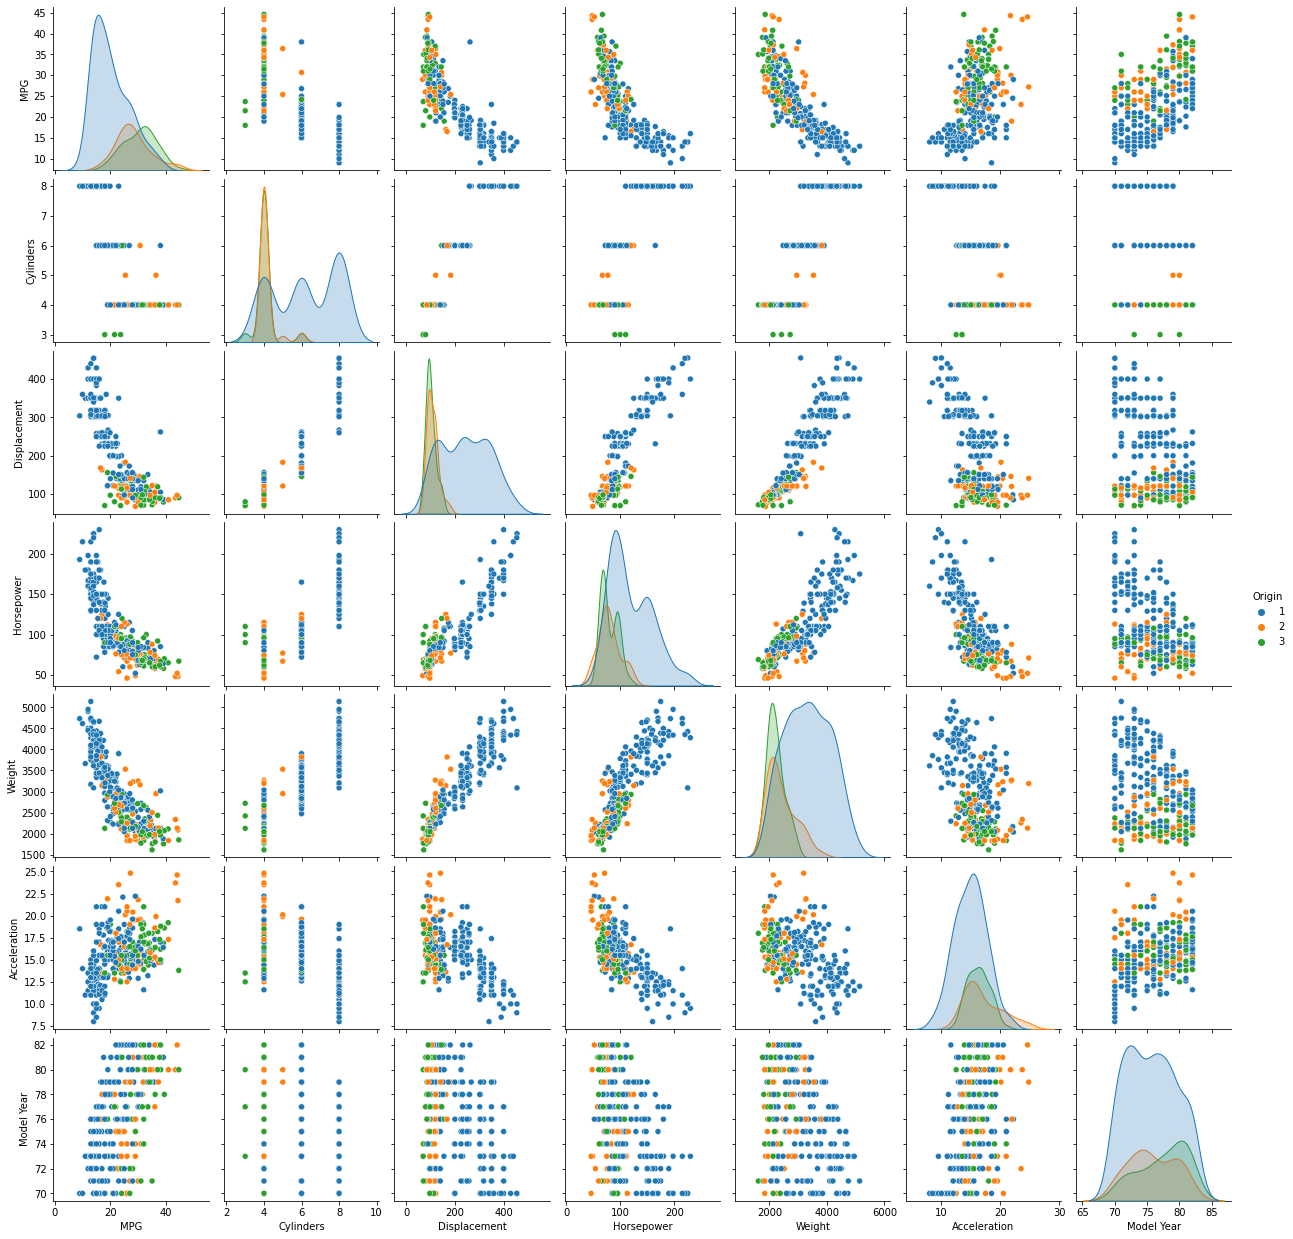

In [11]:
sns.pairplot(data = dataframe , hue='Origin', palette='tab10')

Checking Correalations between Features

MPG             1.000000
Model Year      0.575630
Origin          0.561089
Acceleration    0.453749
Horsepower     -0.791798
Cylinders      -0.798505
Displacement   -0.818860
Weight         -0.837118
Name: MPG, dtype: float64


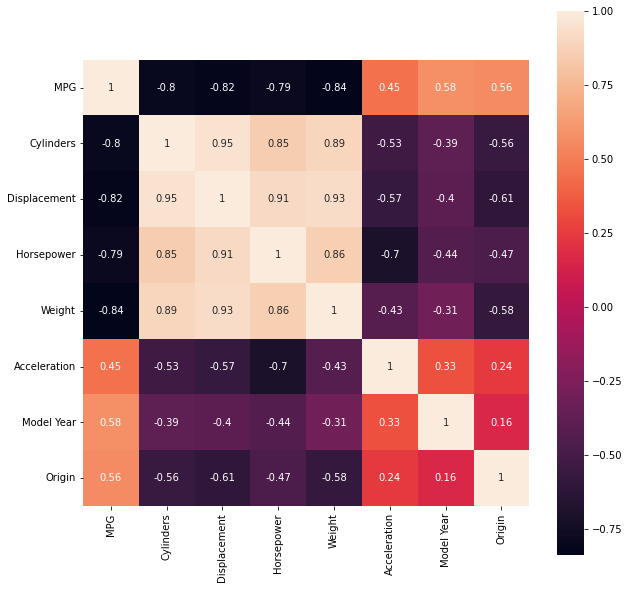

In [12]:
corr_matrix = dataframe.corr()
print(corr_matrix['MPG'].sort_values(ascending=False))
plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix , annot=True , square=True)
plt.show()

# Data Preprocessing

### Handling missing values in Horsepower

In [13]:
# Replacing NaN values in Horsepower with median
dataframe['Horsepower'].fillna(dataframe.Horsepower.median() , inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    300 non-null    float64
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Brand         300 non-null    object 
 9   Model         298 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 23.6+ KB


In [14]:
# Here we can see that Model also has 2 missing values but at the same time model has very less feature importance in
# our model as most of the values are unique. Hence we are going to drop the Model Column
dataframe.drop('Model',inplace=True, axis=1)
dataframe

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    13.0          8         400.0       190.0    4422          12.5   
1    13.0          8         350.0       145.0    3988          13.0   
2    15.5          8         350.0       170.0    4165          11.4   
3    17.0          6         231.0       110.0    3907          21.0   
4    13.0          8         318.0       150.0    3755          14.0   
..    ...        ...           ...         ...     ...           ...   
295  22.0          6         232.0       112.0    2835          14.7   
296  18.0          6         250.0        78.0    3574          21.0   
297  18.1          8         302.0       139.0    3205          11.2   
298  15.0          8         318.0       150.0    4135          13.5   
299  40.9          4          85.0        92.0    1835          17.3   

     Model Year  Origin      Brand  
0            72       1   chrysler  
1            73       1  chevrolet  
2            77       1  chevrolet  
3            75       1      buick  
4            76       1      dodge  
..          ...     ...        ...  
295          82       1       ford  
296          76       1       ford  
297          78       1       ford  
298          72       1   plymouth  
299          80       2    renault  

[300 rows x 9 columns]

In [15]:
X = dataframe.drop('MPG',axis=1)
Y = dataframe.MPG

In [16]:
quantitive_cols = ['Displacement','Horsepower','Weight','Acceleration']
categorical_cols = ['Cylinders','Model Year','Origin']

In [17]:
# Scaling numeric features and One-Hot Encoding Categorical Features of the dataset
num_pipeline = Pipeline(steps=[
                        ("scaler",StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
                ("num",num_pipeline,quantitive_cols),
                ("cat",OneHotEncoder(handle_unknown='ignore',sparse=False),categorical_cols)])


#### Train Test Split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42,shuffle=True)

In [19]:
x_train.shape

(225, 8)

In [20]:
x_train_final = preprocessor.fit_transform(x_train)
colTrain_name_final = preprocessor.get_feature_names_out(input_features=X.columns)
x_train_final = pd.DataFrame(x_train_final, columns = colTrain_name_final)

In [21]:
x_train_final

num__Displacement  num__Horsepower  num__Weight  num__Acceleration  \
0             2.265046         2.495849     1.661488          -2.023237   
1             1.203335         1.222095     0.527557          -1.660187   
2            -0.394012        -0.370096    -0.349975           0.155063   
3             0.055541        -0.237413    -0.068298           0.155063   
4             0.313794         0.027952     0.575707          -0.026462   
..                 ...              ...          ...                ...   
220           1.825058         1.752826     0.724972          -2.023237   
221          -0.556617        -0.210877    -0.311455          -0.752562   
222          -0.910520        -0.980436    -0.981943           0.881162   
223          -0.680961         0.160634    -0.434237          -1.006697   
224           1.509414         1.222095     2.092429          -0.389512   

     cat__Cylinders_3  cat__Cylinders_4  cat__Cylinders_5  cat__Cylinders_6  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               1.0               0.0               0.0   
3                 0.0               0.0               0.0               1.0   
4                 0.0               0.0               0.0               1.0   
..                ...               ...               ...               ...   
220               0.0               0.0               0.0               0.0   
221               0.0               1.0               0.0               0.0   
222               0.0               1.0               0.0               0.0   
223               0.0               1.0               0.0               0.0   
224               0.0               0.0               0.0               0.0   

     cat__Cylinders_8  cat__Model Year_70  ...  cat__Model Year_76  \
0                 1.0                 1.0  ...                 0.0   
1                 1.0                 0.0  ...                 0.0   
2                 0.0                 0.0  ...                 0.0   
3                 0.0                 0.0  ...                 0.0   
4                 0.0                 0.0  ...                 0.0   
..                ...                 ...  ...                 ...   
220               1.0                 1.0  ...                 0.0   
221               0.0                 0.0  ...                 0.0   
222               0.0                 0.0  ...                 0.0   
223               0.0                 0.0  ...                 0.0   
224               1.0                 0.0  ...                 0.0   

     cat__Model Year_77  cat__Model Year_78  cat__Model Year_79  \
0                   0.0                 0.0                 0.0   
1                   0.0                 0.0                 0.0   
2                   0.0                 0.0                 1.0   
3                   0.0                 0.0                 0.0   
4                   0.0                 0.0                 0.0   
..                  ...                 ...                 ...   
220                 0.0                 0.0                 0.0   
221                 0.0                 0.0                 0.0   
222                 0.0                 0.0                 0.0   
223                 1.0                 0.0                 0.0   
224                 0.0                 0.0                 0.0   

     cat__Model Year_80  cat__Model Year_81  cat__Model Year_82  \
0                   0.0                 0.0                 0.0   
1                   0.0                 0.0                 0.0   
2                   0.0                 0.0                 0.0   
3                   0.0                 0.0                 0.0   
4                   0.0                 0.0                 0.0   
..                  ...                 ...                 ...   
220                 0.0                 

In [22]:
x_test_final = preprocessor.transform(x_test)
colTest_name_final = preprocessor.get_feature_names_out(input_features=X.columns)
x_test_final = pd.DataFrame(x_test_final, columns = colTest_name_final)

In [23]:
x_test_final

num__Displacement  num__Horsepower  num__Weight  num__Acceleration  \
0           -1.082689        -0.900827    -1.067409           1.425737   
1           -0.489662        -0.874290     0.275974           3.349901   
2           -0.900955        -0.635461    -1.258805          -0.425817   
3            0.313794        -0.104731     0.564873           0.590722   
4           -0.977475        -0.900827    -1.232322          -0.571037   
..                ...              ...          ...                ...   
70           0.552918        -0.104731     0.386719          -0.207987   
71          -0.700091        -0.582388    -0.289788           1.389432   
72          -1.025300        -0.900827    -1.168524           0.518112   
73          -0.977475        -0.900827    -1.232322          -0.498427   
74          -0.910520        -0.423169    -0.820640           1.244212   

    cat__Cylinders_3  cat__Cylinders_4  cat__Cylinders_5  cat__Cylinders_6  \
0                0.0               1.0               0.0               0.0   
1                0.0               1.0               0.0               0.0   
2                0.0               1.0               0.0               0.0   
3                0.0               0.0               0.0               1.0   
4                0.0               1.0               0.0               0.0   
..               ...               ...               ...               ...   
70               0.0               0.0               0.0               1.0   
71               0.0               1.0               0.0               0.0   
72               0.0               1.0               0.0               0.0   
73               0.0               1.0               0.0               0.0   
74               0.0               1.0               0.0               0.0   

    cat__Cylinders_8  cat__Model Year_70  ...  cat__Model Year_76  \
0                0.0                 0.0  ...                 0.0   
1                0.0                 0.0  ...                 0.0   
2                0.0                 0.0  ...                 0.0   
3                0.0                 0.0  ...                 0.0   
4                0.0                 0.0  ...                 0.0   
..               ...                 ...  ...                 ...   
70               0.0                 0.0  ...                 0.0   
71               0.0                 0.0  ...                 0.0   
72               0.0                 0.0  ...                 1.0   
73               0.0                 0.0  ...                 1.0   
74               0.0                 0.0  ...                 0.0   

    cat__Model Year_77  cat__Model Year_78  cat__Model Year_79  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 1.0   
2                  0.0                 0.0                 1.0   
3                  0.0                 1.0                 0.0   
4                  0.0                 0.0                 0.0   
..                 ...                 ...                 ...   
70                 0.0                 0.0                 0.0   
71                 0.0                 0.0                 0.0   
72                 0.0                 0.0                 0.0   
73                 0.0                 0.0                 0.0   
74                 0.0                 0.0                 0.0   

    cat__Model Year_80  cat__Model Year_81  cat__Model Year_82  cat__Origin_1  \
0                  0.0                 0.0                 0.0            0.0   
1                  0.0                 0.0                 0.0            0.0   
2                  0.0                 0.0                 0.0            1.0   
3                  0.0                 0.0                 0.0            1.0   
4                  0.0                 0.0                 0.0            0.0   
..                 ...                 ...                 ...        

#### Introducing Polynomial Features in the Dataset

In [24]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_final = poly.fit_transform(x_train_final)
x_test_final = poly.fit_transform(x_test_final)

# Models

In [25]:
# Function to calculate metrics of a model
def metric(y_true,y_pred,model):
    rmse = mean_squared_error(y_true,y_pred,squared=False)
    mae = mean_absolute_error(y_true,y_pred)
    r2score = r2_score(y_true,y_pred)
    crossval = cross_val_score(model,x_train_final,y_train,cv=5)
    
    return rmse,mae,r2score, crossval.mean()

### Linear Regression

In [26]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_final,y_train)

y_pred = linear_regression.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,linear_regression)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 7187229718.24653
Mean Absolute Error : 1320584484.1127489
R2 Score : -8.574904592561865e+17
Cross Validation : -3.6100452261615563e+22


### Bayesian Regression

In [27]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(x_train_final,y_train)

y_pred = bayesian_ridge.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,bayesian_ridge)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 2.4619259383516274
Mean Absolute Error : 1.823527369869206
R2 Score : 0.8993865102558406
Cross Validation : 0.859343023092449


### Ridge Regression

In [28]:
ridge_regression = Ridge(max_iter=10000, random_state=42)
ridge_regression.fit(x_train_final,y_train)

y_pred = ridge_regression.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,ridge_regression)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 2.6218574136162682
Mean Absolute Error : 1.9512353129249524
R2 Score : 0.8858898218188439
Cross Validation : 0.8432731032543833


### Lasso Regression

In [29]:
lasso_regression = Lasso(max_iter=10000, random_state=42)
lasso_regression.fit(x_train_final,y_train)

y_pred = lasso_regression.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,lasso_regression)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 3.998534542267756
Mean Absolute Error : 3.069856742250135
R2 Score : 0.7345957036782144
Cross Validation : 0.6672268953123955


### Elastic Net

In [30]:
elastic_net = ElasticNet()
elastic_net.fit(x_train_final,y_train)

y_pred = elastic_net.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,elastic_net)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 3.9621219400504453
Mean Absolute Error : 3.073112107395377
R2 Score : 0.7394074956707717
Cross Validation : 0.6759875658015186


### KNN Regressor

In [31]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train_final,y_train)

y_pred = knn_regressor.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,knn_regressor)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 3.629000964452889
Mean Absolute Error : 2.7272000000000003
R2 Score : 0.7813847711390585
Cross Validation : 0.7781666039122341


### XGBoost

In [32]:
xgb = XGBRegressor()
xgb.fit(x_train_final,y_train)

y_pred = xgb.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,xgb)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 3.113330478714925
Mean Absolute Error : 2.2026149241129556
R2 Score : 0.8390997602437912
Cross Validation : 0.7725370500103532


### SVR

In [33]:
svr = SVR()
svr.fit(x_train_final,y_train)

y_pred = svr.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,svr)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 3.9163104115340306
Mean Absolute Error : 2.826875014293461
R2 Score : 0.7453987925104115
Cross Validation : 0.665785038876993


### Random Forest Regressor

In [34]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train_final,y_train)

y_pred = random_forest_regressor.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,random_forest_regressor)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 3.0495379125369144
Mean Absolute Error : 2.272333333333333
R2 Score : 0.8456259426915541
Cross Validation : 0.7684347759106858


The top performing baseline models are :
1. Bayesian Regression
2. Ridge Regression
3. KNN Regressor
4. XGBoost Regressor
5. Random Forest Regressor

Now lets try to improve their respective performances by tuning their hyperparameters

# Tuning Hyperparameters using RandomizedSearchCV

In [35]:
model_params = {
    'bayesian_regression' : {
        'model' : bayesian_ridge,
        'params' : {
            'n_iter' : [1,5,10,30,70,100,150,200,250,300,350,400,450,500,650,800],
            'tol' : [10000,1000,100,10,1,0.1,0.01,0.001,0.0001],
            'alpha_1' : [1e-1,1e-3,1e-5,1e-6,1e-7,1e-9,1e-10,],
            'alpha_2' : [1e-1,1e-3,1e-5,1e-6,1e-7,1e-9,1e-10,],
            'lambda_1' : [1e-1,1e-3,1e-5,1e-6,1e-7,1e-9,1e-10,],
            'lambda_2' : [1e-1,1e-3,1e-5,1e-6,1e-7,1e-9,1e-10,],
            'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9, 'None'],
            'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9, 'None']
        }        
    },
    'ridge_regression': {
        'model' : ridge_regression,
        'params' : {
            'tol' : [10000,1000,100,10,1,0.1,0.01,0.001,0.0001],
            'alpha' : np.logspace(-4,-0.5,30)            
        }
    },
    'knn_regressor' : {
      'model' : knn_regressor,
      'params' : {
          'n_neighbors': [3,4,5,6,7,11,13,15,19,45,64],
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski','euclidean','manhattan'],
          'algorithm':['auto', 'kd_tree']
      }
    },
    'xgboost' : {
        'model' : xgb,
        'params' : {
            'nthread': [4],
            'learning_rate':[0.03, 0.05, 0.07, 0.1],
            'max_depth': [5, 6, 7],
            'min_child_weight': [4],
            'subsample': [0.7],
            'colsample_bytree': [0.7],
            'n_estimators':[500, 700, 1000]
        }
    },
    'random_forest_regressor' : {
        'model' : random_forest_regressor,
        'params' : {
            'random_state':[42],
            'n_estimators':[10,50,100,150,300,600,1200],
            'min_samples_split' : [1,2,4,6,8,10],
            'min_samples_leaf' : [1,3,5]
        }
    }
}

In [36]:
score = []

for model_name, mp in model_params.items():
    grid = RandomizedSearchCV(mp['model'] , mp['params'] , cv=8 , n_iter=100, random_state=42)
    grid.fit(x_train_final,y_train)
    
    grid.best_estimator_.fit(x_train_final,y_train)
    y_pred = grid.best_estimator_.predict(x_test_final)
    rmse, mae, r2score, crossval = metric(y_test,y_pred,grid.best_estimator_)
    score.append({
        'model' : model_name,
        'best_score' : grid.best_score_,
        'RMSE' : rmse , 
        'MAE' : mae , 
        'R2 Score' : r2score , 
        'CrossVal' : crossval,
        'best_params' : grid.best_params_,
        
    })

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
176 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_bayes.py", line 291, in fit
    coef_, rmse_ = self._update_coef_(
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\s

In [37]:
score

[{'model': 'bayesian_regression',
  'best_score': 0.8567705403691641,
  'RMSE': 2.4615327216521066,
  'MAE': 1.8229781399331333,
  'R2 Score': 0.8994186474897612,
  'CrossVal': 0.8593878623640496,
  'best_params': {'tol': 0.001,
   'n_iter': 350,
   'lambda_init': 1e-05,
   'lambda_2': 1e-07,
   'lambda_1': 0.1,
   'alpha_init': 1,
   'alpha_2': 1e-09,
   'alpha_1': 1e-05}},
 {'model': 'ridge_regression',
  'best_score': 0.7838424852552084,
  'RMSE': 2.854040857749514,
  'MAE': 2.0577663755789266,
  'R2 Score': 0.8647844569250195,
  'CrossVal': 0.8077874797018275,
  'best_params': {'tol': 0.001, 'alpha': 0.31622776601683794}},
 {'model': 'knn_regressor',
  'best_score': 0.8160619423577833,
  'RMSE': 3.085114588033275,
  'MAE': 2.2781284124625447,
  'R2 Score': 0.8420029990840721,
  'CrossVal': 0.8128263975667641,
  'best_params': {'weights': 'distance',
   'n_neighbors': 7,
   'metric': 'manhattan',
   'algorithm': 'kd_tree'}},
 {'model': 'xgboost',
  'best_score': 0.8327424909461437,


In [38]:
pd.DataFrame(score)

model  best_score      RMSE       MAE  R2 Score  \
0      bayesian_regression    0.856771  2.461533  1.822978  0.899419   
1         ridge_regression    0.783842  2.854041  2.057766  0.864784   
2            knn_regressor    0.816062  3.085115  2.278128  0.842003   
3                  xgboost    0.832742  2.863336  2.128773  0.863902   
4  random_forest_regressor    0.793177  3.069018  2.322086  0.843647   

   CrossVal                                        best_params  
0  0.859388  {'tol': 0.001, 'n_iter': 350, 'lambda_init': 1...  
1  0.807787       {'tol': 0.001, 'alpha': 0.31622776601683794}  
2  0.812826  {'weights': 'distance', 'n_neighbors': 7, 'met...  
3  0.817432  {'subsample': 0.7, 'nthread': 4, 'n_estimators...  
4  0.778226  {'random_state': 42, 'n_estimators': 100, 'min...

The best performing model among these is Bayesian Ridge Regression Model.

# Final Modelling

In [39]:
final_model = BayesianRidge(tol = 0.001,
   n_iter = 350,
   lambda_init = 1e-05,
   lambda_2 = 1e-07,
   lambda_1 = 0.1,
   alpha_init = 1,
   alpha_2 = 1e-09,
   alpha_1 = 1e-05)

final_model.fit(x_train_final,y_train)

y_pred = final_model.predict(x_test_final)
rmse, mae, r2score, crossval = metric(y_test,y_pred,final_model)
print(f"Root Mean Squared Error : {rmse}\nMean Absolute Error : {mae}\nR2 Score : {r2score}\nCross Validation : {crossval}")

Root Mean Squared Error : 2.4615327216521066
Mean Absolute Error : 1.8229781399331333
R2 Score : 0.8994186474897612
Cross Validation : 0.8593878623640496


# Saving the Final Trained and Tuned Model

In [40]:
from joblib import dump

dump(final_model, "Model.joblib")

['Model.joblib']